Phase 0 : Imports and Reading Data
**bold text**

In [73]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings (1).csv


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import missingno as msno
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
df = pd.read_csv('hotel_bookings.csv')

In [75]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


**Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report**

In [76]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

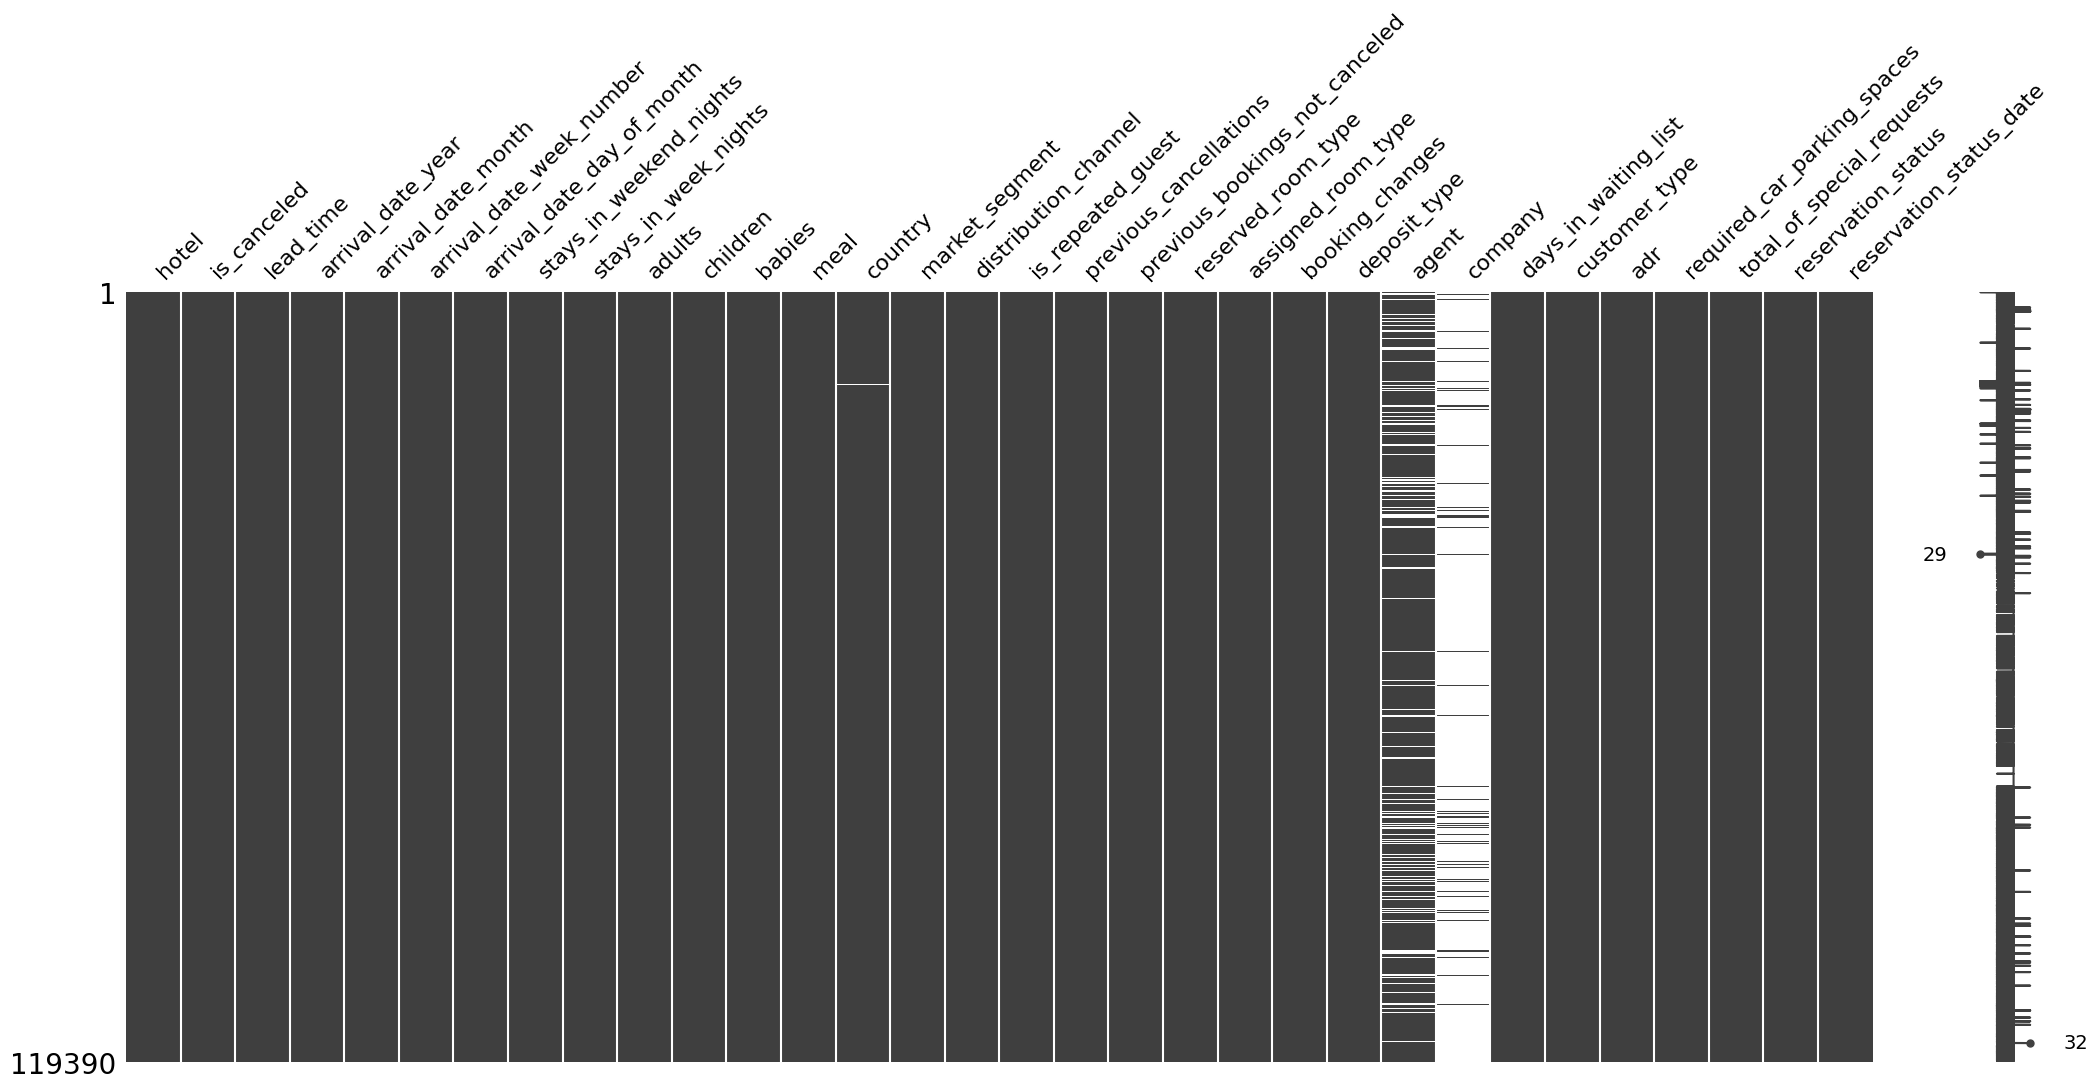

In [78]:
msno.matrix(df)
plt.show()

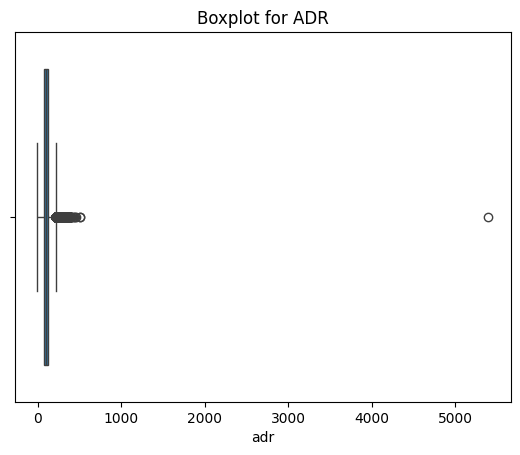

In [79]:
sns.boxplot(x=df['adr'])
plt.title("Boxplot for ADR")
plt.show()

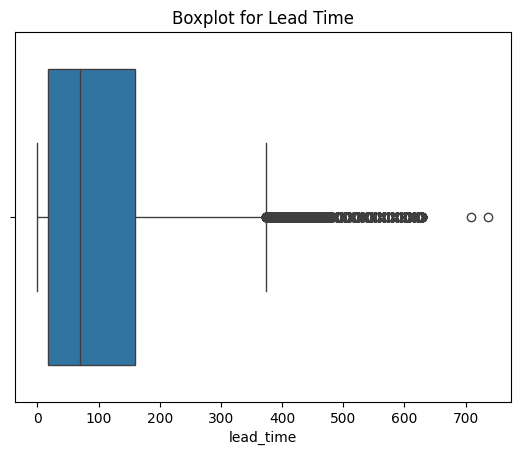

In [80]:
sns.boxplot(x=df['lead_time'])
plt.title("Boxplot for Lead Time")
plt.show()

In [81]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers, lower_bound, upper_bound, Q1, Q3, IQR

In [82]:
adr_outliers, adr_low, adr_high ,q1a , q3a, iqra = detect_outliers_iqr(df['adr'])
print(f"Q1: {q1a:.2f}")
print(f"Q3: {q3a:.2f}")
print(f"IQR: {iqra:.2f}")
print(f"ADR outliers count: {len(adr_outliers)}")
print(f"ADR bounds: {adr_low:.2f} - {adr_high:.2f}")

Q1: 69.29
Q3: 126.00
IQR: 56.71
ADR outliers count: 3793
ADR bounds: -15.77 - 211.06


In [83]:
lt_outliers, lt_low, lt_high ,q1l , q3l, iqrl  = detect_outliers_iqr(df['lead_time'])
print(f"Q1: {q1l:.2f}")
print(f"Q3: {q3l:.2f}")
print(f"IQR: {iqrl:.2f}")
print(f"Lead Time outliers count: {len(lt_outliers)}")
print(f"Lead Time bounds: {lt_low:.2f} - {lt_high:.2f}")

Q1: 18.00
Q3: 160.00
IQR: 142.00
Lead Time outliers count: 3005
Lead Time bounds: -195.00 - 373.00


**⌨ Data Quality Report**

After performing Exploratory Data Analysis (EDA) on the hotel booking dataset, the following data quality issues were identified:

1. **Missing Values:**


*   Columns such as children, country, agent, company contain missing values.

*   company has a large proportion of missing entries (over 90%), which may limit its usefulness.

*   agent also has a significant number of missing values.

2. **Outliers:**


*   ADR (Average Daily Rate): Extremely high ADR values exist and are considered unrealistic. As well as, Boxplot analysis shows a large number of outliers.

*   Lead Time: Outliers are present with high unrealistic values. Also, IQR analysis identified ~3000+ outliers outside the acceptable range.



3.   **Skewed Distributions:**

*   Features such as lead_time and adr are highly skewed, which may affect modeling performance if not treated.
*   Boxplots confirm long-tailed distributions with many extreme values.




4.   **Data Types Issues:**

During the initial inspection of the dataset, some columns were found to have incorrect data types, which may affect analysis and modeling.


*  children: Currently stored as float64, even though the number of children should always be an integer.

*   is_canceled: Stored as int64 (values 0 and 1). Since, this represents a binary outcome (canceled or not canceled), it is better represented as a boolean (True/False) for clarity.

*   reservation_status_date: Stored as object (string format). This column represents calendar dates, so it should be converted to datetime type.































---

**Phase 2: Data Cleaning (The Core of the Project)**






In [84]:
df['agent'].fillna(0,inplace=True)
df['company'].fillna('None',inplace=True)
df['country'].fillna('Unknown',inplace=True)
df

/tmp/ipython-input-3683364254.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agent'].fillna(0,inplace=True)
/tmp/ipython-input-3683364254.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,None,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,None,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,None,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,None,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,None,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,None,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,None,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,None,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,None,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [85]:
df['agent']= df['agent'].astype(int)
df=df.astype({'is_canceled':'boolean','is_repeated_guest':'boolean'})
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df.dtypes

,0
hotel,object
is_canceled,boolean
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [86]:
print("Missing before:", df['children'].isna().sum())
mode_value = df['children'].mode()[0]
median_value = df['children'].median()
mode_freq = (df['children'] == mode_value).mean()
if mode_freq > 0.7:
    fill_value = mode_value
    method = "mode"
else:
    fill_value = median_value
    method = "median"
df['children'].fillna(fill_value, inplace=True)
print(f"Imputed missing values in 'children' using {method} ({fill_value})")
print("Missing after:", df['children'].isna().sum())

df['children']= df['children'].astype(int)


Missing before: 4
Imputed missing values in 'children' using mode (0.0)
Missing after: 0


/tmp/ipython-input-2393253911.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(fill_value, inplace=True)


In [87]:
df.loc[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,False,14,2015,July,27,1,0,2,2,...,No Deposit,240,None,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,False,72,2015,July,27,1,2,4,2,...,No Deposit,250,None,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,False,70,2015,July,27,2,2,3,2,...,No Deposit,250,None,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,True,5,2015,July,28,5,1,0,2,...,No Deposit,240,None,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,False,0,2015,July,28,7,0,1,1,...,No Deposit,240,None,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,False,186,2017,August,35,31,0,3,2,...,No Deposit,9,None,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,False,63,2017,August,35,31,0,3,3,...,No Deposit,9,None,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,False,63,2017,August,35,31,0,3,3,...,No Deposit,9,None,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,False,63,2017,August,35,31,0,3,3,...,No Deposit,9,None,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [91]:
df.drop_duplicates(keep="first", inplace=True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,False,342,2015,July,27,1,0,0,2,...,No Deposit,0,None,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,False,737,2015,July,27,1,0,0,2,...,No Deposit,0,None,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,False,7,2015,July,27,1,0,1,1,...,No Deposit,0,None,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,False,13,2015,July,27,1,0,1,1,...,No Deposit,304,None,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,False,14,2015,July,27,1,0,2,2,...,No Deposit,240,None,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,23,2017,August,35,30,2,5,2,...,No Deposit,394,None,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,False,102,2017,August,35,31,2,5,3,...,No Deposit,9,None,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,False,34,2017,August,35,31,2,5,2,...,No Deposit,9,None,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,False,109,2017,August,35,31,2,5,2,...,No Deposit,89,None,0,Transient,104.40,0,0,Check-Out,2017-09-07


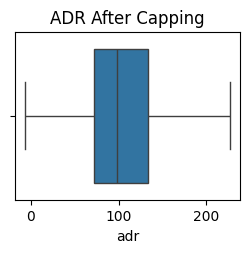

In [98]:
df['adr'] = df['adr'].clip( lower = adr_low, upper=adr_high)

plt.subplot(2,2,3)
sns.boxplot(x=df['adr'])
plt.title("ADR After Capping")

plt.show()

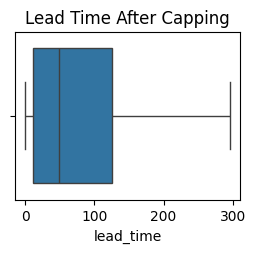

In [99]:
df['lead_time'] = df['lead_time'].clip( lower = lt_low, upper=lt_high)

plt.subplot(2,2,4)
sns.boxplot(x=df['lead_time'])
plt.title("Lead Time After Capping")

plt.show()

In [102]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,False,296,2015,July,27,1,0,0,2,...,No Deposit,0,None,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,False,296,2015,July,27,1,0,0,2,...,No Deposit,0,None,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,False,7,2015,July,27,1,0,1,1,...,No Deposit,0,None,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,False,13,2015,July,27,1,0,1,1,...,No Deposit,304,None,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,False,14,2015,July,27,1,0,2,2,...,No Deposit,240,None,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,23,2017,August,35,30,2,5,2,...,No Deposit,394,None,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,False,102,2017,August,35,31,2,5,3,...,No Deposit,9,None,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,False,34,2017,August,35,31,2,5,2,...,No Deposit,9,None,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,False,109,2017,August,35,31,2,5,2,...,No Deposit,89,None,0,Transient,104.40,0,0,Check-Out,2017-09-07


**In this phase**✅ , I addressed the main data quality issues in the hotel bookings dataset. Missing values were handled using appropriate strategies depending on the column (e.g., median/mode imputation for children, replacing company and agent with "None"/0, imputing country with mode or "Unknown"). Duplicate records were removed to ensure dataset integrity. Outliers in numerical columns such as adr and lead_time were capped using an IQR-based approach to reduce their skewing effect. Additionally, date columns were converted to proper datetime format for accurate time-based analysis.

**As a result**, the dataset is now clean, consistent, and ready for further exploratory data analysis (EDA) and model building.⛳


---






**Phase 3: Feature Engineering & Preprocessing**

In [104]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']

df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

df['is_family'] = df.apply(lambda row: 'Yes' if (row['children'] > 0 or row['babies'] > 0) else 'No', axis=1)

df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights,is_family
0,Resort Hotel,False,296,2015,July,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,2,0,No
1,Resort Hotel,False,296,2015,July,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,2,0,No
2,Resort Hotel,False,7,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1,No
3,Resort Hotel,False,13,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1,No
4,Resort Hotel,False,14,2015,July,27,1,0,2,2,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,23,2017,August,35,30,2,5,2,...,0,Transient,96.14,0,0,Check-Out,2017-09-06,2,7,No
119386,City Hotel,False,102,2017,August,35,31,2,5,3,...,0,Transient,225.43,0,2,Check-Out,2017-09-07,3,7,No
119387,City Hotel,False,34,2017,August,35,31,2,5,2,...,0,Transient,157.71,0,4,Check-Out,2017-09-07,2,7,No
119388,City Hotel,False,109,2017,August,35,31,2,5,2,...,0,Transient,104.40,0,0,Check-Out,2017-09-07,2,7,No


In [105]:
df.drop(['reservation_status', 'reservation_status_date'], axis=1, inplace=True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_nights,is_family
0,Resort Hotel,False,296,2015,July,27,1,0,0,2,...,0,None,0,Transient,0.00,0,0,2,0,No
1,Resort Hotel,False,296,2015,July,27,1,0,0,2,...,0,None,0,Transient,0.00,0,0,2,0,No
2,Resort Hotel,False,7,2015,July,27,1,0,1,1,...,0,None,0,Transient,75.00,0,0,1,1,No
3,Resort Hotel,False,13,2015,July,27,1,0,1,1,...,304,None,0,Transient,75.00,0,0,1,1,No
4,Resort Hotel,False,14,2015,July,27,1,0,2,2,...,240,None,0,Transient,98.00,0,1,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,23,2017,August,35,30,2,5,2,...,394,None,0,Transient,96.14,0,0,2,7,No
119386,City Hotel,False,102,2017,August,35,31,2,5,3,...,9,None,0,Transient,225.43,0,2,3,7,No
119387,City Hotel,False,34,2017,August,35,31,2,5,2,...,9,None,0,Transient,157.71,0,4,2,7,No
119388,City Hotel,False,109,2017,August,35,31,2,5,2,...,89,None,0,Transient,104.40,0,0,2,7,No


In [106]:
df.dtypes

,0
hotel,object
is_canceled,boolean
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [108]:
df = pd.get_dummies(df, columns=['meal','market_segment','distribution_channel',
'reserved_room_type','assigned_room_type','deposit_type','customer_type' ], drop_first=True)
df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,Resort Hotel,False,296,2015,July,27,1,0,0,2,...,False,False,False,False,False,False,False,False,True,False
1,Resort Hotel,False,296,2015,July,27,1,0,0,2,...,False,False,False,False,False,False,False,False,True,False
2,Resort Hotel,False,7,2015,July,27,1,0,1,1,...,False,False,False,False,False,False,False,False,True,False
3,Resort Hotel,False,13,2015,July,27,1,0,1,1,...,False,False,False,False,False,False,False,False,True,False
4,Resort Hotel,False,14,2015,July,27,1,0,2,2,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,23,2017,August,35,30,2,5,2,...,False,False,False,False,False,False,False,False,True,False
119386,City Hotel,False,102,2017,August,35,31,2,5,3,...,False,False,False,False,False,False,False,False,True,False
119387,City Hotel,False,34,2017,August,35,31,2,5,2,...,False,False,False,False,False,False,False,False,True,False
119388,City Hotel,False,109,2017,August,35,31,2,5,2,...,False,False,False,False,False,False,False,False,True,False


In [113]:
country_freq = df['country'].value_counts().to_dict()
df['country_encoded'] = df['country'].map(country_freq)

threshold = 100
df['country_grouped'] = df['country'].apply(lambda x: x if country_freq[x] >= threshold else 'Other')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,country_encoded,country_grouped
0,Resort Hotel,False,296,2015,July,27,1,0,0,2,...,False,False,False,False,False,False,True,False,27453,PRT
1,Resort Hotel,False,296,2015,July,27,1,0,0,2,...,False,False,False,False,False,False,True,False,27453,PRT
2,Resort Hotel,False,7,2015,July,27,1,0,1,1,...,False,False,False,False,False,False,True,False,10433,GBR
3,Resort Hotel,False,13,2015,July,27,1,0,1,1,...,False,False,False,False,False,False,True,False,10433,GBR
4,Resort Hotel,False,14,2015,July,27,1,0,2,2,...,False,False,False,False,False,False,True,False,10433,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,23,2017,August,35,30,2,5,2,...,False,False,False,False,False,False,True,False,2081,BEL
119386,City Hotel,False,102,2017,August,35,31,2,5,3,...,False,False,False,False,False,False,True,False,8837,FRA
119387,City Hotel,False,34,2017,August,35,31,2,5,2,...,False,False,False,False,False,False,True,False,5387,DEU
119388,City Hotel,False,109,2017,August,35,31,2,5,2,...,False,False,False,False,False,False,True,False,10433,GBR


**Final Preparation: ⚡ :** Split your cleaned dataset into training and testing sets (test_size = 0.2,
random_state = 42).

In [114]:
from sklearn.model_selection import train_test_split

X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (69916, 67)
Testing set shape: (17480, 67)
